In [62]:
# Data source: https://www.dukascopy.com/swiss/english/marketwatch/historical/
import numpy as np
import pandas as pd
%matplotlib inline

In [63]:
from pathlib import Path
csvpath = Path('../Resources/BTC5Y_Data.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Close
Date,
2015-11-19,326.41
2015-11-20,322.39
2015-11-21,327.00
2015-11-22,323.71
2015-11-23,323.00


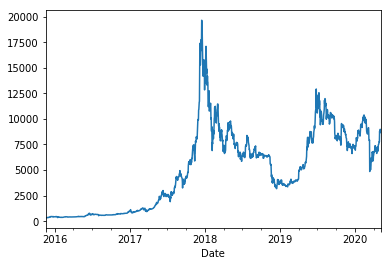

In [64]:
# Hourly EUR to USD exchange rates
df.Close.plot()

In [65]:
# Hourly percentage changes in exchange rate (resampled to daily)
df['Close'] = df.Close.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Close
Date,
2015-11-20,-29.557918
2015-11-21,34.318682
2015-11-22,-24.146789
2015-11-23,-5.263971
2015-11-24,-14.860681


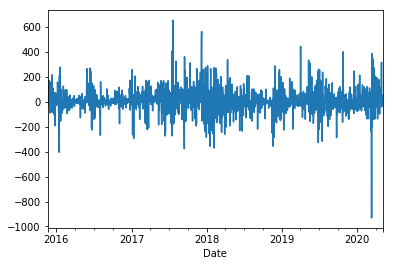

In [66]:
df.Close.plot()

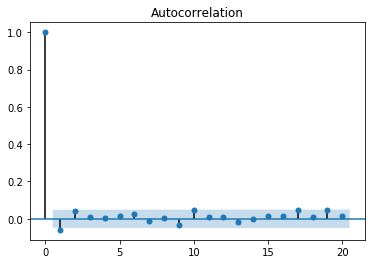

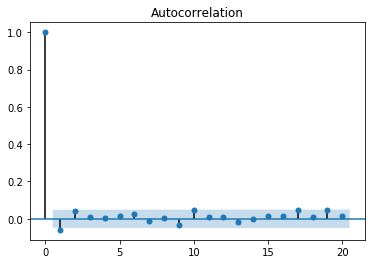

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags=20)

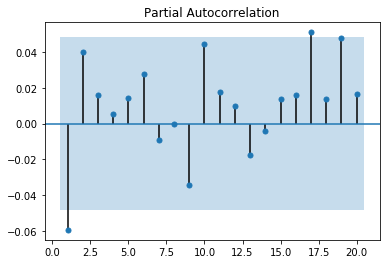

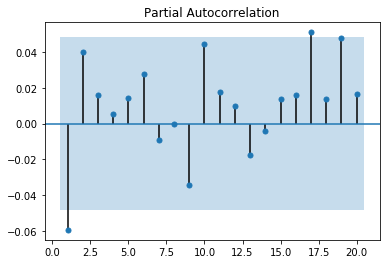

In [68]:
plot_pacf(df.Close, zero=False, lags=20)

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Close'], order=(1, 1, 1))

In [70]:
results = model.fit()

In [71]:
results.summary

<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARIMAResults object at 0x1a1fd2ec10>>

# GARCH

In [72]:
import arch as arch
from arch import arch_model

In [73]:
# Create the GARCH model
model = arch_model(df.Close, mean="Zero", vol="GARCH", p=1, q=1)

In [74]:
# Output the model summary
res = model.fit(disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -9635.50
Distribution:                  Normal   AIC:                           19277.0
Method:            Maximum Likelihood   BIC:                           19293.2
                                        No. Observations:                 1628
Date:                Sun, May 10 2020   Df Residuals:                     1625
Time:                        13:22:32   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        478.4964    218.212      2.193  2.832e-02 [ 50.808,9.062e+02]
alpha[1]       0.1589  4.618e-02      3.441  5.805e-04 [6.838e-02,  0.249]
beta[1]        0.8129  3.216e-02     25.274 6.157e-141   [  0.750,  0.876]
==========================================================================

Covariance estimator: robust
"""

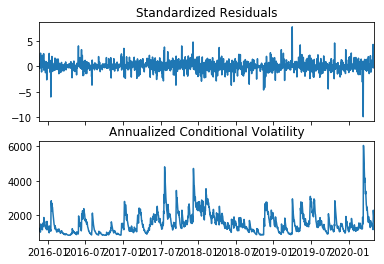

In [75]:
# Plot the model estimate of the annualized volatility
fig = res.plot(annualize='D')

# Forecasting from GARCH

In [76]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2020-05-04'

In [77]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
forecast_horizon = 50

# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [78]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.41,h.42,h.43,h.44,h.45,h.46,h.47,h.48,h.49,h.50
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-04,1557.88003,1574.535041,1590.553504,1605.967373,1620.806325,1635.097982,1648.868112,1662.140799,1674.938595,1687.282652,...,1920.436743,1924.759946,1928.952006,1933.017191,1936.959615,1940.78324,1944.491882,1948.089222,1951.578809,1954.964066


# Visualizing the forecast

In [79]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-05-04 00:00:00
h.01,1557.880030
h.02,1574.535041
h.03,1590.553504
h.04,1605.967373
h.05,1620.806325


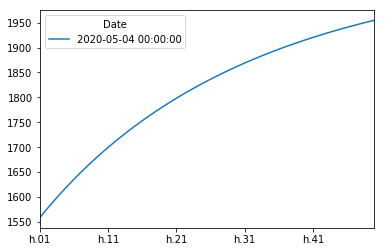

In [80]:
# Plot the final forecast
final.plot()

Question: Is the exchange rate risk expected to increase or decrease over the next 5 days?

Answer: # YOUR ANSWER HERE!

In [81]:
Increase

NameError: name 'Increase' is not defined